# DLUB

## 1. PyTorch vs TensorFlow

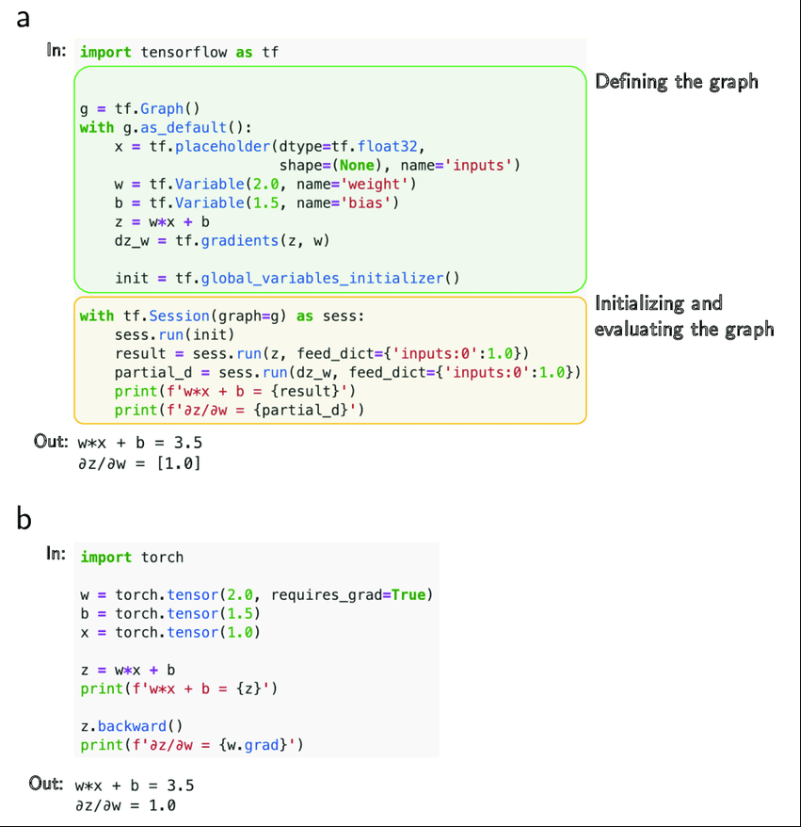

## 2. Computational Graph Example

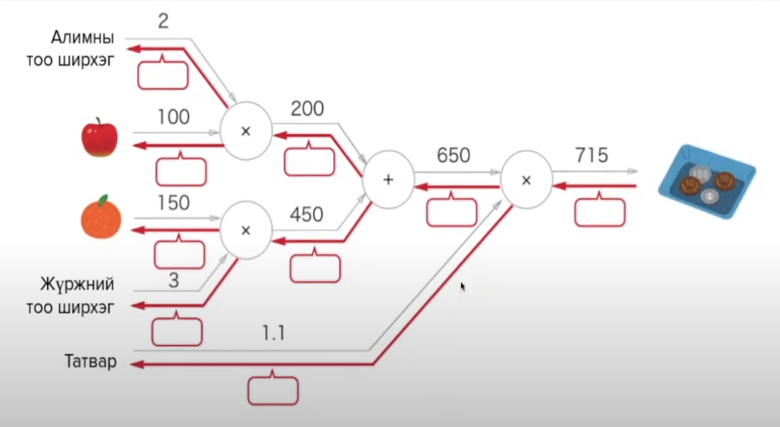

### Multiply Layer

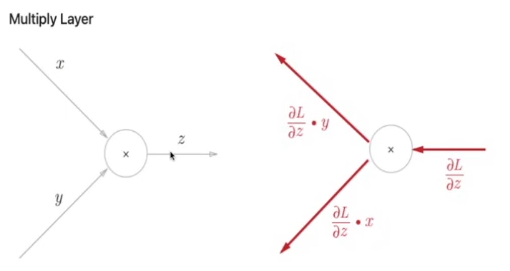

In [1]:
class MulLayer:
  def __init__(self):
    self.x = None
    self.y = None

  def forward(self, x, y):
    self.x = x
    self.y = y
    out = x * y
    return out

  def backward(self, dout):
    dx = dout * self.y
    dy = dout * self.x
    return dx, dy

### Add Layer

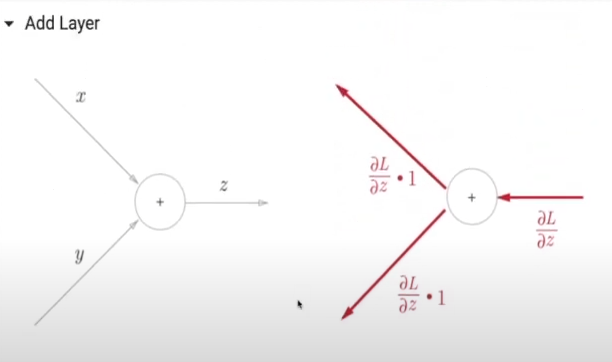

In [2]:
class AddLayer:
  def __init__(self):
    pass

  def forward(self, x, y):
    out = x + y
    return out

  def backward(self, dout):
    dx = dout * 1
    dy = dout * 1
    return dx, dy

In [3]:
# params
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

In [4]:
# forward
apple_price   = mul_apple_layer.forward(apple, apple_num) # (1)
orange_price  = mul_orange_layer.forward(orange, orange_num) # (2)
all_price     = add_apple_orange_layer.forward(apple_price, orange_price) # (3)
total         = mul_tax_layer.forward(all_price, tax) # (4)

In [5]:
total

715.0000000000001

In [7]:
total_grad = 1 # grad
# backward
all_price_grad, tax_grad              = mul_tax_layer.backward(total_grad)  # (4)
apple_price_grad, orange_price_grad   = add_apple_orange_layer.backward(all_price_grad) # (3)
orange_grad, orange_num_grad          = mul_orange_layer.backward(orange_price_grad) # (2)
apple_grad, apple_num_grad            = mul_apple_layer.backward(apple_price_grad) # (1)

In [8]:
print("price:", int(total))
print("dApple:", apple_grad)
print("dApple_num:", int(apple_num_grad))
print("dOrange:", orange_grad)
print("dOrange_num:", int(orange_num_grad))
print("dTax:", tax_grad)

price: 715
dApple: 2.2
dApple_num: 110
dOrange: 3.3000000000000003
dOrange_num: 165
dTax: 650


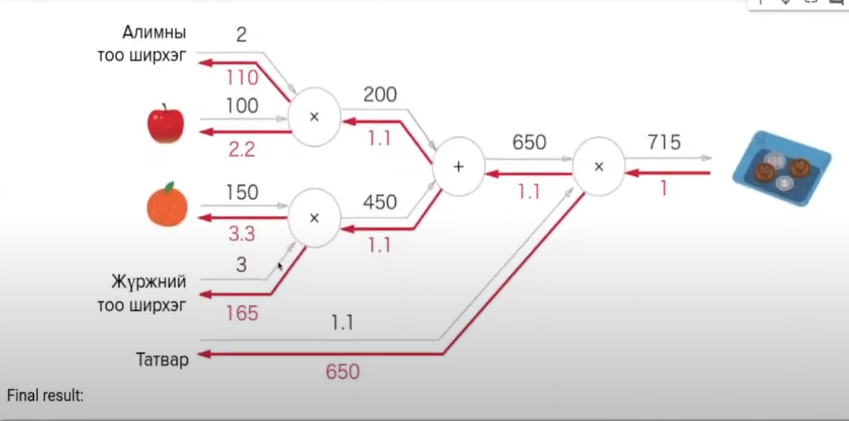

### Parameter Update:

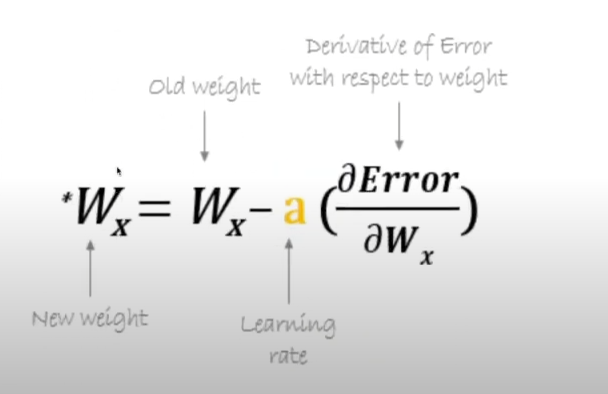

In [10]:
l_rate      = 0.1
apple       = apple - l_rate * apple_grad
apple_num   = apple_num - l_rate * apple_num_grad
orange      = orange - l_rate * orange_grad
orange_num  = orange_num - l_rate * orange_grad
tax         = tax - l_rate * tax_grad

print("Apple:", apple)
print("Apple_num:", apple_num)
print("Orange:", orange)
print("Orange_num:", orange_num)
print("Tax:", tax)

Apple: 99.56
Apple_num: -20.000000000000004
Orange: 149.33999999999997
Orange_num: 2.34
Tax: -128.9


## 3. Pytorch: Tensors and Autograd

In [11]:
import torch
from torch import nn
import numpy as np

In [12]:
torch.zeros([2, 4], dtype=torch.int32)
device = torch.device('cpu:0')
torch.ones([2, 4], dtype=torch.float64, device=device)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)

In [13]:
np_array = np.array(([1,1,1], [2,2,2], [3,3,3]))
tensor = torch.from_numpy(np_array)

In [14]:
a = torch.tensor([1,2,3])
a

tensor([1, 2, 3])

In [15]:
b = torch.tensor([1,2,3])
b

tensor([1, 2, 3])

In [16]:
a * b

tensor([1, 4, 9])

In [17]:
a @ b.T

C:\Users\User\AppData\Local\Temp\ipykernel_17696\1796088366.py:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3575.)
  a @ b.T


tensor(14)

In [18]:
tensor

tensor([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]], dtype=torch.int32)

### element-wise product

In [19]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)}")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1, 1, 1],
        [4, 4, 4],
        [9, 9, 9]], dtype=torch.int32)
tensor * tensor 
 tensor([[1, 1, 1],
        [4, 4, 4],
        [9, 9, 9]], dtype=torch.int32)


### matrix multiplication

In [20]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[ 3,  6,  9],
        [ 6, 12, 18],
        [ 9, 18, 27]], dtype=torch.int32) 

tensor @ tensor.T 
 tensor([[ 3,  6,  9],
        [ 6, 12, 18],
        [ 9, 18, 27]], dtype=torch.int32)


In [21]:
print(f"tensor.matmul(tensor.T) \n {tensor.T.matmul(tensor)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor.T @ tensor}")

tensor.matmul(tensor.T) 
 tensor([[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]], dtype=torch.int32) 

tensor @ tensor.T 
 tensor([[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]], dtype=torch.int32)


In [22]:
tensor

tensor([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]], dtype=torch.int32)

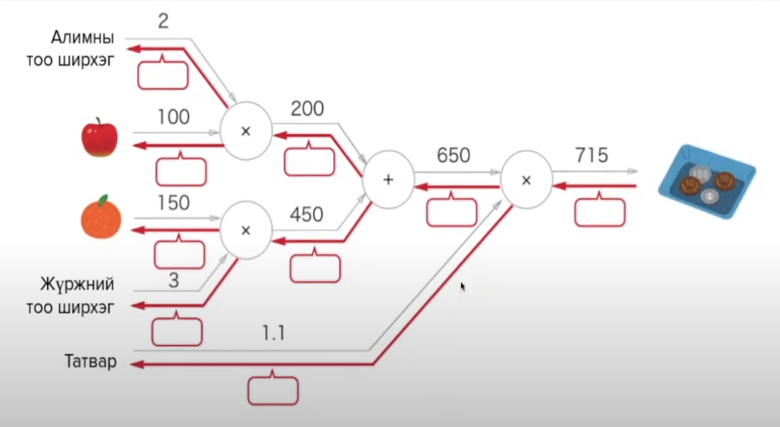

In [23]:
appleT = torch.tensor(100., requires_grad=True)
apple_numT = torch.tensor(2.0, requires_grad=True)
orangeT = torch.tensor(150.0, requires_grad=True)
orange_numT = torch.tensor(3.0, requires_grad=True)
taxT = torch.tensor(1.1, requires_grad=True)

In [24]:
appleT.shape

torch.Size([])

In [25]:
z_out = (appleT * apple_numT + orangeT * orange_numT) * taxT

In [26]:
print(z_out)

tensor(715., grad_fn=<MulBackward0>)


In [27]:
z_out.backward()

In [28]:
type(appleT)

torch.Tensor

In [29]:
print("dApple:", appleT.grad)
print("dApple_num:", apple_numT.grad)
print("dOrange:", orangeT.grad)
print("dOrange_num:", orange_numT.grad)
print("dTax:", taxT.grad)

dApple: tensor(2.2000)
dApple_num: tensor(110.)
dOrange: tensor(3.3000)
dOrange_num: tensor(165.)
dTax: tensor(650.)


In [30]:
print("dApple:", apple_grad)
print("dApple_num:", int(apple_num_grad))
print("dOrange:", orange_grad)
print("dOrange_num:", int(orange_num_grad))
print("dTax:", tax_grad)

dApple: 2.2
dApple_num: 110
dOrange: 3.3000000000000003
dOrange_num: 165
dTax: 650


In [31]:
apple = torch.tensor(100.0, requires_grad=True)
apple_num = torch.tensor(2.0, requires_grad=True)
orange = torch.tensor(150.0, requires_grad=True)
orange_num = torch.tensor(3.0, requires_grad=True)
tax = torch.tensor(1.1, requires_grad=True)

In [32]:
learning_rate = 1e-6

In [33]:
z = torch.tensor(600.0)

In [34]:
for t in range(5):
    z_pred = (apple * apple_num + orange * orange_num) * tax
    loss = (z_pred - z).pow(2)
    # loss = z_pred - z
    print(t, loss)

    loss.backward()

    # Disabling Gradient Tracking
    with torch.no_grad():
        apple      -= learning_rate * apple.grad
        apple_num  -= learning_rate * apple_num.grad
        orange     -= learning_rate * orange.grad
        orange_num -= learning_rate * orange_num.grad
        tax        -= learning_rate * tax.grad

        apple.grad      = None
        apple_num.grad  = None
        orange.grad     = None
        orange_num.grad = None
        tax.grad        = None

    print(f'Result: {z_pred} = ({apple} x {apple_num} + {orange} x {orange_num}) * {tax}')

0 tensor(13225., grad_fn=<PowBackward0>)
Result: 715.0 = (99.99949645996094 x 1.9746999740600586 + 149.99923706054688 x 2.962049961090088) * 0.9505000114440918
1 tensor(100.1282, grad_fn=<PowBackward0>)
Result: 610.0064086914062 = (99.99945831298828 x 1.9727977514266968 + 149.99917602539062 x 2.9591965675354004) * 0.9376562833786011
2 tensor(1.4012, grad_fn=<PowBackward0>)
Result: 601.1837158203125 = (99.99945068359375 x 1.9725757837295532 + 149.99917602539062 x 2.9588634967803955) * 0.936138391494751
3 tensor(0.0205, grad_fn=<PowBackward0>)
Result: 600.1430053710938 = (99.99945068359375 x 1.9725489616394043 + 149.99917602539062 x 2.9588234424591064) * 0.9359550476074219
4 tensor(0.0003, grad_fn=<PowBackward0>)
Result: 600.0172729492188 = (99.99945068359375 x 1.9725457429885864 + 149.99917602539062 x 2.9588186740875244) * 0.9359328746795654


In [35]:
apple = torch.tensor(100.0, requires_grad=True)
apple_num = torch.tensor(2.0, requires_grad=False)
orange = torch.tensor(150.0, requires_grad=True)
orange_num = torch.tensor(3.0, requires_grad=False)
tax = torch.tensor(1.1, requires_grad=True)

In [36]:
z = torch.tensor(600.0)

In [37]:
for t in range(10):
    z_pred = (apple * apple_num + orange * orange_num) * tax
    loss = (z_pred - z).pow(2)
    print(t, loss)

    loss.backward()

    # Disabling Gradient Tracking
    with torch.no_grad():
        apple  -= learning_rate * apple.grad
        orange -= learning_rate * orange.grad
        tax    -= learning_rate * tax.grad

        apple.grad  = None
        orange.grad = None
        tax.grad    = None

    print(f'Result: {z_pred} = ({apple} x {apple_num} + {orange} x {orange_num}) * {tax}')

0 tensor(13225., grad_fn=<PowBackward0>)
Result: 715.0 = (99.99949645996094 x 2.0 + 149.99923706054688 x 3.0) * 0.9505000114440918
1 tensor(317.6201, grad_fn=<PowBackward0>)
Result: 617.8218994140625 = (99.99942779541016 x 2.0 + 149.99913024902344 x 3.0) * 0.9273316860198975
2 tensor(7.6291, grad_fn=<PowBackward0>)
Result: 602.7620849609375 = (99.99942016601562 x 2.0 + 149.99911499023438 x 3.0) * 0.9237409830093384
3 tensor(0.1833, grad_fn=<PowBackward0>)
Result: 600.4281616210938 = (99.99942016601562 x 2.0 + 149.99911499023438 x 3.0) * 0.9231843948364258
4 tensor(0.0044, grad_fn=<PowBackward0>)
Result: 600.0663452148438 = (99.99942016601562 x 2.0 + 149.99911499023438 x 3.0) * 0.9230981469154358
5 tensor(0.0001, grad_fn=<PowBackward0>)
Result: 600.0103149414062 = (99.99942016601562 x 2.0 + 149.99911499023438 x 3.0) * 0.9230847358703613
6 tensor(2.5183e-06, grad_fn=<PowBackward0>)
Result: 600.0015869140625 = (99.99942016601562 x 2.0 + 149.99911499023438 x 3.0) * 0.9230826497077942
7 ten

## 4. Build Model: Pytorch Implementation MLP

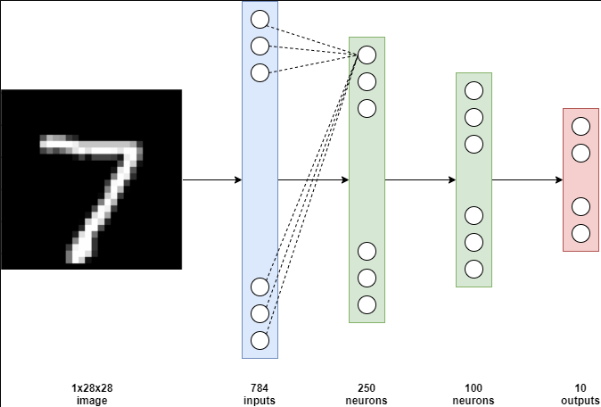

In [50]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, SubsetRandomSampler
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [44]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [45]:
training_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)
validation_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor()
)

0.3%

100.0%


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw



100.0%

Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw




2.0%

100.0%


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw



100.0%

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



In [48]:
print(training_data)
print(validation_data)
print(training_data.data.size())

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()
torch.Size([60000, 28, 28])


In [49]:
plt.imshow(training_data.data[1], cmap='gray')
plt.title('%i' % training_data.targets[1])
plt.show()
torch.set_printoptions(linewidth=200)
training_data.data[1]

NameError: name 'plt' is not defined

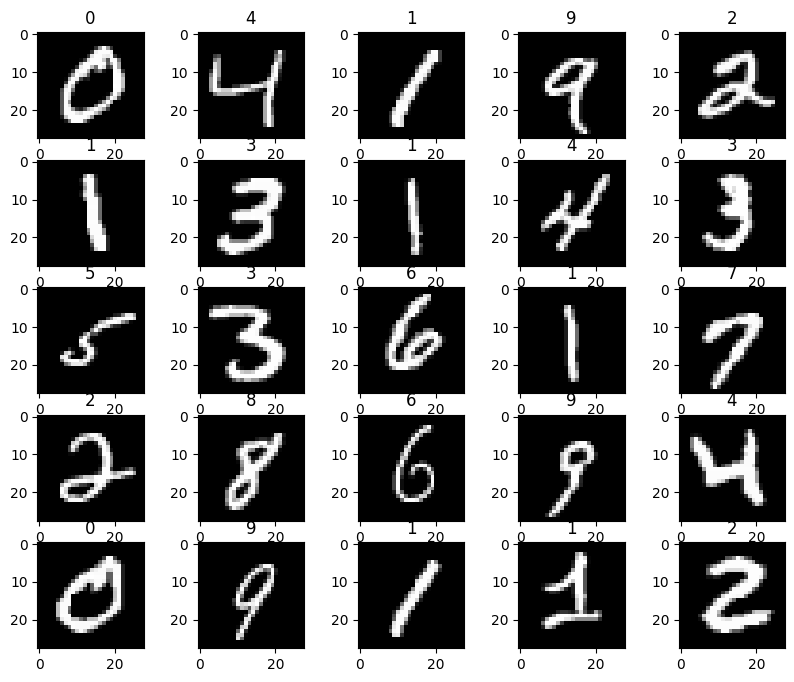

In [ ]:
figure = plt.figure(figsize=(10, 8))
for i in range(1, 26):
    img, label = training_data[i]
    figure.add_subplot(5, 5, i)
    plt.title(label)
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
idxs = list(range(1000))
batch_size = 50
training_data_loader = torch.utils.data.DataLoader(training_data,
                                          batch_size=batch_size,
                                          num_workers=1,
                                          sampler=SubsetRandomSampler(idxs)
                                          )

val_idxs = list(range(1000))
validation_data_loader = torch.utils.data.DataLoader(validation_data,
                                          batch_size=batch_size,
                                          num_workers=1,
                                          sampler=SubsetRandomSampler(idxs))

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(28*28, 250)
        self.linear2 = nn.Linear(250, 100)
        self.linear3 = nn.Linear(100, 10)

    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.linear3(x)
        return x

In [ ]:
model = MLP()
model

MLP(
  (linear1): Linear(in_features=784, out_features=250, bias=True)
  (linear2): Linear(in_features=250, out_features=100, bias=True)
  (linear3): Linear(in_features=100, out_features=10, bias=True)
)

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
epoch = 100
losses = list()
val_losses = list()

epoch_loss_history = list()
epoch_acc_history = list()

epoch_val_loss_history = list()
epoch_val_acc_history = list()

CEL = nn.CrossEntropyLoss()


for i in range(epoch):
    training_corrects = 0.0
    training_loss = 0.0

    val_corrects = 0.0
    val_loss = 0.0

    # Training
    for X, y in training_data_loader:
        X = X.view(X.shape[0], -1)
        # forward
        y_pred = model.forward(X)

        # loss calculation
        S = CEL(y_pred, y)

        # initialize gradient
        optimizer.zero_grad()

        # backward
        S.backward()
        optimizer.step()

        losses.append(S.item())
        max_vals, max_idxs = torch.max(y_pred, 1)
        training_corrects += torch.sum(max_idxs == y.data)
        training_loss += S.item()

    epoch_loss = training_loss / len(training_data_loader)
    epoch_acc = 100.0 * training_corrects / ( len(training_data_loader) * batch_size )

    epoch_loss_history.append(epoch_loss)
    epoch_acc_history.append(epoch_acc)

    if i % 10 == 0:
        print("Epoch: ", i+1)
        print("Training loss: {:.4f}, Training acc: {:.4f}". format(epoch_loss, epoch_acc))

Epoch:  1
Training loss: 2.3076, Training acc: 10.3000
Epoch:  11
Training loss: 2.2240, Training acc: 47.6000
Epoch:  21
Training loss: 1.9929, Training acc: 54.4000
Epoch:  31
Training loss: 1.4425, Training acc: 62.0000
Epoch:  41
Training loss: 0.9324, Training acc: 79.4000
Epoch:  51
Training loss: 0.6656, Training acc: 85.1000
Epoch:  61
Training loss: 0.5229, Training acc: 87.4000
Epoch:  71
Training loss: 0.4362, Training acc: 88.2000
Epoch:  81
Training loss: 0.3752, Training acc: 89.8000
Epoch:  91
Training loss: 0.3297, Training acc: 90.5000


## 5. Pytorch Simple Self-Attention implementation

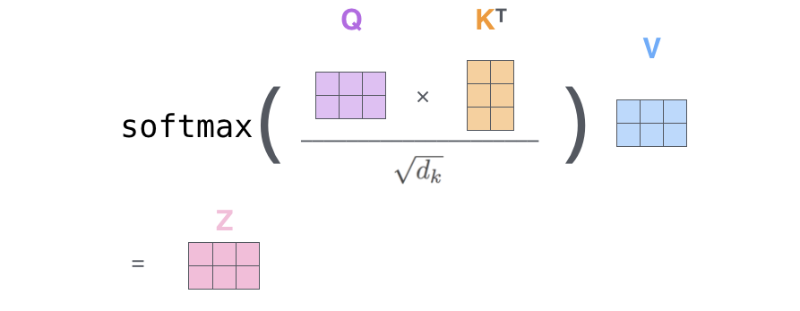

Steps:

* Prepare inputs
* Initialise weights
* Derive key, query and value
* Calculate attention scores
* Calculate softmax
* Attention Output

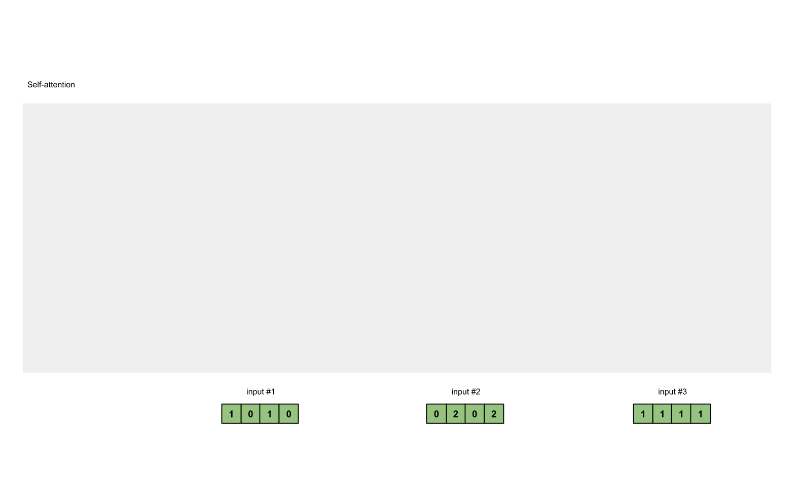

In [ ]:
#### Prepare inputs
x = [
  [1, 0, 1, 0], # Input 1
  [0, 2, 0, 2], # Input 2
  [1, 1, 1, 1]  # Input 3
 ]
x = torch.tensor(x, dtype=torch.float32)
x

tensor([[1., 0., 1., 0.],
        [0., 2., 0., 2.],
        [1., 1., 1., 1.]])

In [ ]:
w_key = [
  [0, 0, 1],
  [1, 1, 0],
  [0, 1, 0],
  [1, 1, 0]
]
w_query = [
  [1, 0, 1],
  [1, 0, 0],
  [0, 0, 1],
  [0, 1, 1]
]
w_value = [
  [0, 2, 0],
  [0, 3, 0],
  [1, 0, 3],
  [1, 1, 0]
]
w_key = torch.tensor(w_key, dtype=torch.float32)
w_query = torch.tensor(w_query, dtype=torch.float32)
w_value = torch.tensor(w_value, dtype=torch.float32)

print("Weights for key: \n", w_key)
print("Weights for query: \n", w_query)
print("Weights for value: \n", w_value)

Weights for key: 
 tensor([[0., 0., 1.],
        [1., 1., 0.],
        [0., 1., 0.],
        [1., 1., 0.]])
Weights for query: 
 tensor([[1., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 1.]])
Weights for value: 
 tensor([[0., 2., 0.],
        [0., 3., 0.],
        [1., 0., 3.],
        [1., 1., 0.]])


### Derive key, query and value

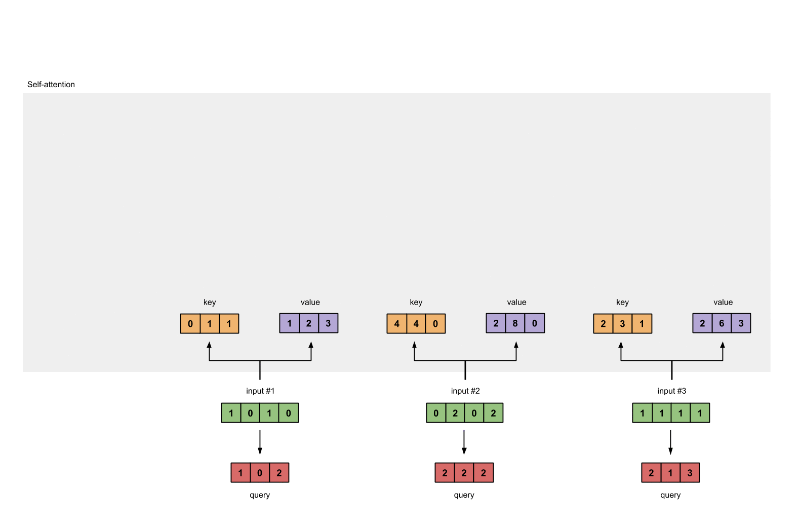

In [ ]:
keys = x @ w_key
querys = x @ w_query
values = x @ w_value

In [ ]:
keys

tensor([[0., 1., 1.],
        [4., 4., 0.],
        [2., 3., 1.]])

In [ ]:
querys

tensor([[1., 0., 2.],
        [2., 2., 2.],
        [2., 1., 3.]])

In [ ]:
values

tensor([[1., 2., 3.],
        [2., 8., 0.],
        [2., 6., 3.]])

In [ ]:
attn_scores = querys @ keys.T
print(attn_scores)

tensor([[ 2.,  4.,  4.],
        [ 4., 16., 12.],
        [ 4., 12., 10.]])


### Calculate softmax

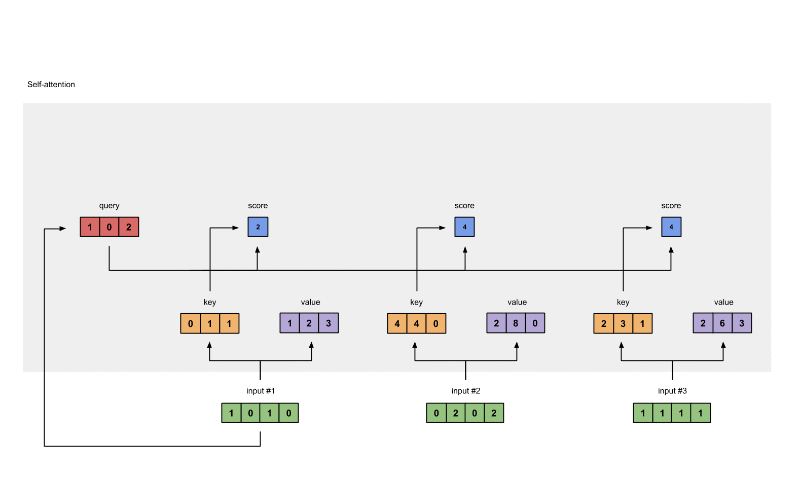

Take the softmax across these attention scores (blue).

    softmax([2, 4, 4]) = [0.0, 0.5, 0.5]

In [ ]:
from torch.nn.functional import softmax

attn_scores_softmax = softmax(attn_scores, dim=-1)
print(attn_scores_softmax)


# For readability,
attn_scores_softmax = [
  [0.0, 0.5, 0.5],
  [0.0, 1.0, 0.0],
  [0.0, 0.9, 0.1]
]
attn_scores_softmax = torch.tensor(attn_scores_softmax)
print(attn_scores_softmax)

tensor([[6.3379e-02, 4.6831e-01, 4.6831e-01],
        [6.0337e-06, 9.8201e-01, 1.7986e-02],
        [2.9539e-04, 8.8054e-01, 1.1917e-01]])
tensor([[0.0000, 0.5000, 0.5000],
        [0.0000, 1.0000, 0.0000],
        [0.0000, 0.9000, 0.1000]])


### Attention Output

In [ ]:
values

tensor([[1., 2., 3.],
        [2., 8., 0.],
        [2., 6., 3.]])

In [ ]:
attn_scores_softmax

tensor([[0.0000, 0.5000, 0.5000],
        [0.0000, 1.0000, 0.0000],
        [0.0000, 0.9000, 0.1000]])

In [ ]:
attn_scores_softmax @ values

tensor([[2.0000, 7.0000, 1.5000],
        [2.0000, 8.0000, 0.0000],
        [2.0000, 7.8000, 0.3000]])

### Soft attention

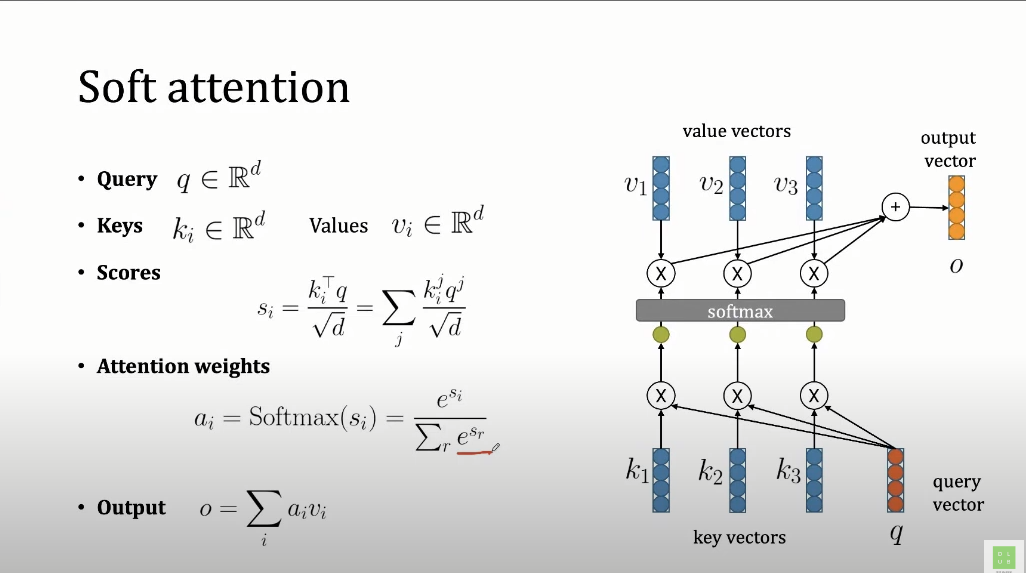

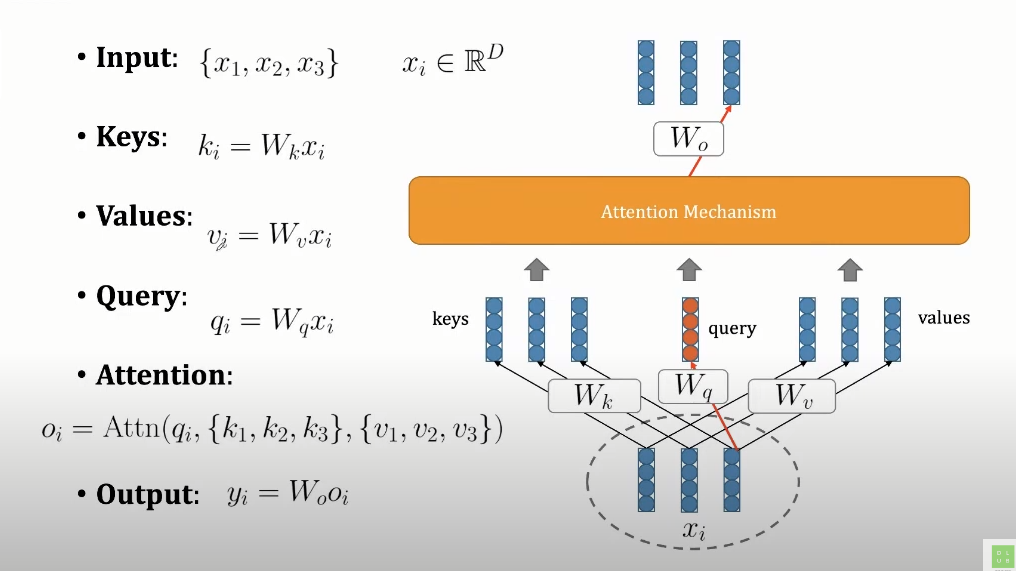